In [174]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
%matplotlib notebook

In [175]:
root_path = '/archive/aes/projects/offline_online_comparison/'
static_path = root_path + 'ocean_annual.static.nc'
woa09_path = root_path + 'offline_woa09/5day/age.bp.0001.500.nc'
vgrid_path = root_path + 'offline_vgrid/5day/age.bp.0026.0325.nc'
online_path = root_path + 'online/age.bp4year.0056.0073.nc'
geolat = nc.Dataset(static_path).variables['geolat'][:,:]
geolon = nc.Dataset(static_path).variables['geolon'][:,:]
lat = nc.Dataset(static_path).variables['yh'][:]
lon = nc.Dataset(static_path).variables['xh'][:]
area = nc.Dataset(static_path).variables['areacello'][:,:]
h_vgrid = nc.Dataset(root_path + 'vgrid.hmean.nc').variables['h_end'][:,:,:,:]
h_woa09 = nc.Dataset(root_path + 'woa09.hmean.nc').variables['h_end'][:,:,:,:]
z_vgrid = nc.Dataset(root_path + 'vgrid.hmean.nc').variables['z_l'][:]
z_woa09 = nc.Dataset(root_path + 'woa09.hmean.nc').variables['woa09_l'][:]

In [176]:
online_time = Dataset(online_path).variables['time'][:]
ntime = online_time.size
age_online = Dataset(online_path).variables['age'][ntime-1,:,:,:]
age_vgrid = Dataset(vgrid_path).variables['age'][73-25-1,:,:,:]
age_woa09 = Dataset(woa09_path).variables['age'][73-1,:,:,:]

In [177]:
def plot_global_surface(ax,data,vmin=0,vmax=1,interval=5):
    m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='gray')
    m.drawparallels(np.arange(-90,120,30))
    m.drawmeridians(np.arange(0,380,60))
    x,y = m(geolon,geolat)
    mesh_ax = ax.pcolormesh(x,y,data,vmin=vmin,vmax=vmax);
    m.contour(x,y,data,np.arange(vmin,vmax+1,interval),colors='black');
    return mesh_ax

In [164]:
age_online[zidx,:,:].count()

250257

<IPython.core.display.Javascript object>


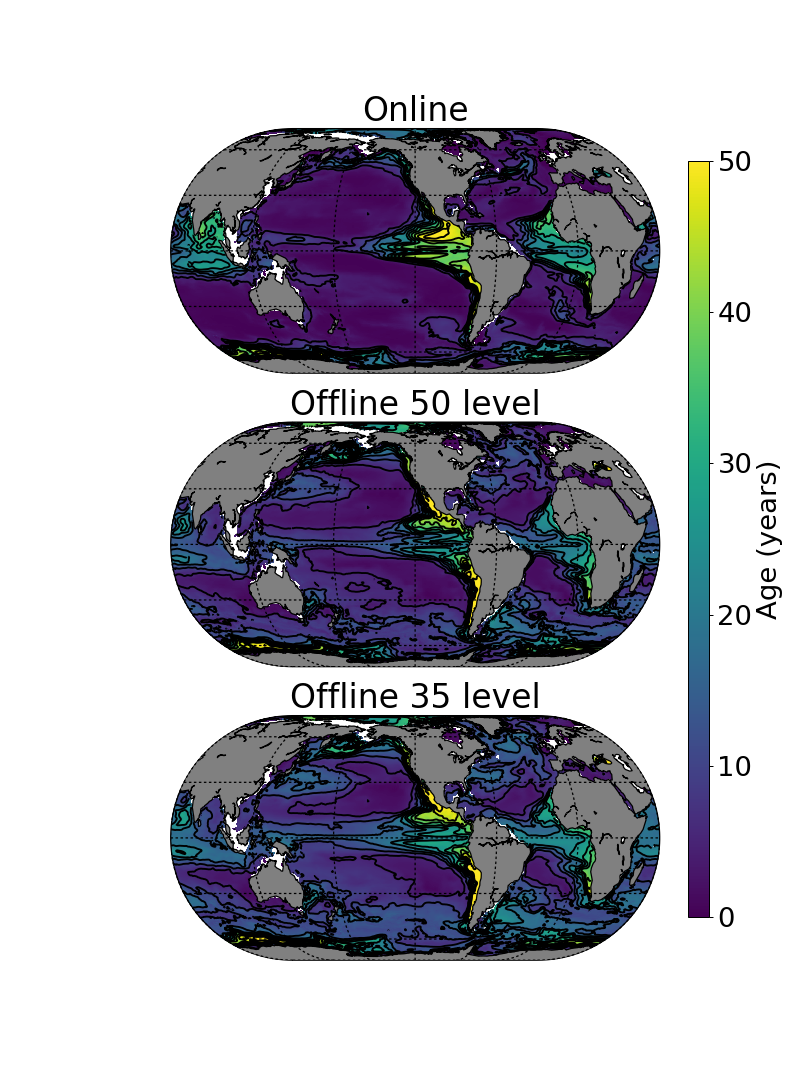

/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: Matpl

98.75
98.75
Online Mean: 10.289679 RMS Error- vgrid: 5.340595 woa09: 6.756258


In [187]:
zidx = 9
age_max = 50
woa_idx = np.argmin(np.abs(z_vgrid[zidx]-z_woa09))
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(9,12))
ax = plt.subplot(3,1,1)
plot_global_surface(ax,age_online[zidx,:,:],0,age_max)
plt.title('Online')
ax = plt.subplot(3,1,2)
plt.title('Offline 50 level')
plot_global_surface(ax,age_vgrid[zidx,:,:],0,age_max)
print(z_vgrid[zidx])
ax = plt.subplot(3,1,3)
plt.title('Offline 35 level')
mesh_ax = plot_global_surface(ax,age_woa09[woa_idx,:,:],0,age_max)
fig.subplots_adjust(hspace=0.2,right=0.9)
cax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(0,age_max,6))
cax.set_ylabel('Age (years)')
print(z_vgrid[zidx])
rms_err_vgrid = np.sqrt(np.square(age_vgrid[zidx,:,:]-age_online[zidx,:,:]))/age_online[zidx,:,:].count()
rms_err_woa09 = np.sqrt(np.square(age_woa09[woa_idx,:,:]-age_online[zidx,:,:]))/age_online[zidx,:,:].count()
print('Online Mean: %f RMS Error- vgrid: %f woa09: %f' % (np.mean(age_online[zidx,:,:]),np.sum(rms_err_vgrid),np.sum(rms_err_woa09)))

<IPython.core.display.Javascript object>


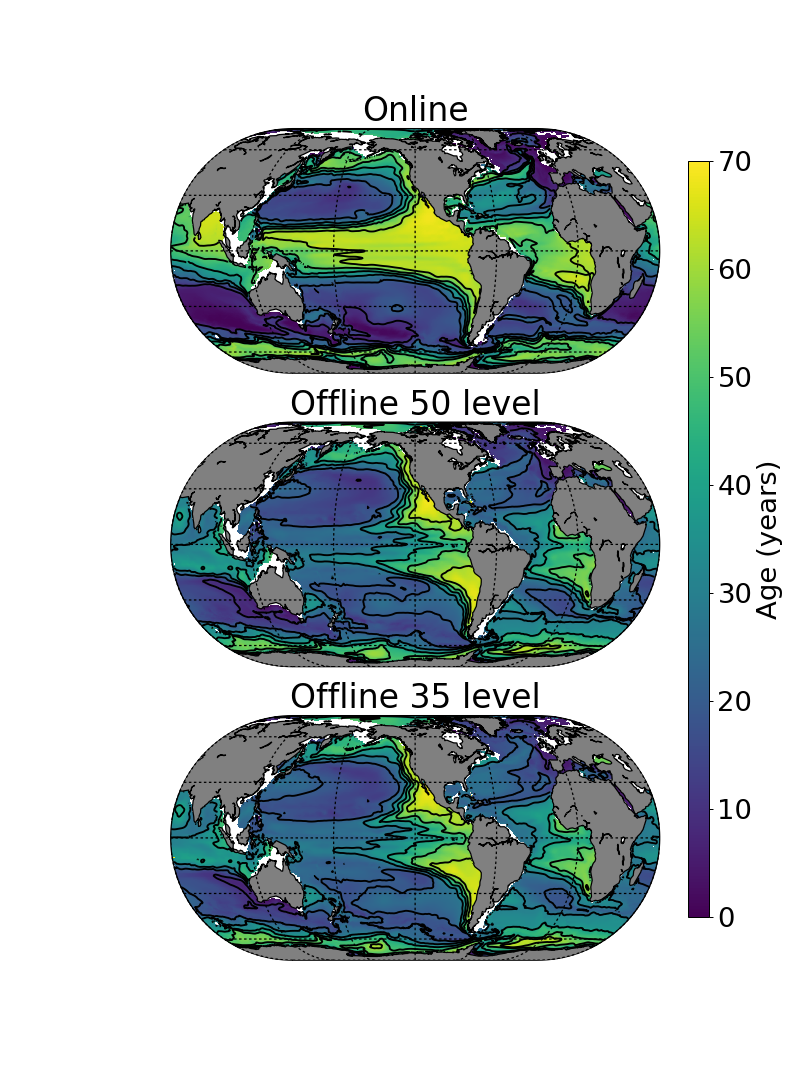

/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3542: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: Matpl

332.5
Online Mean: 35.034873 RMS Error- vgrid: 9.146049 woa09: 9.535813


In [186]:
zidx = 20
woa_idx = np.argmin(np.abs(z_vgrid[zidx]-z_woa09))
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(9,12))
ax = plt.subplot(3,1,1)
plot_global_surface(ax,age_online[zidx,:,:],0,70,10)
plt.title('Online')
ax = plt.subplot(3,1,2)
plt.title('Offline 50 level')
plot_global_surface(ax,age_vgrid[zidx,:,:],0,70,10)
print(z_vgrid[zidx])
ax = plt.subplot(3,1,3)
plt.title('Offline 35 level')
mesh_ax = plot_global_surface(ax,age_woa09[woa_idx,:,:],0,70,10)
fig.subplots_adjust(hspace=0.2,right=0.9)
cax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(0,70,8))
cax.set_ylabel('Age (years)')
rms_err_vgrid = np.sqrt(np.square(age_vgrid[zidx,:,:]-age_online[zidx,:,:]))/age_online[zidx,:,:].count()
rms_err_woa09 = np.sqrt(np.square(age_woa09[woa_idx,:,:]-age_online[zidx,:,:]))/age_online[zidx,:,:].count()
print('Online Mean: %f RMS Error- vgrid: %f woa09: %f' % (np.mean(age_online[zidx,:,:]),np.sum(rms_err_vgrid),np.sum(rms_err_woa09)))

In [179]:
def plot_meridional_age(ax,z,data,vmin,vmax):
    mesh_ax = ax.pcolormesh(lat,z,data,vmin=vmin,vmax=vmax);    
    ax.contour(lat,z,data,np.arange(vmin,vmax+1,5),colors='black',ls='solid');    
    ax.set_xlim((-80,65))
    ax.set_xticks(np.arange(-60,70,20))
    ax.set_ylim((0,1500))
    ax.invert_yaxis()
    ax.grid(ls='dotted')
    return mesh_ax

<IPython.core.display.Javascript object>


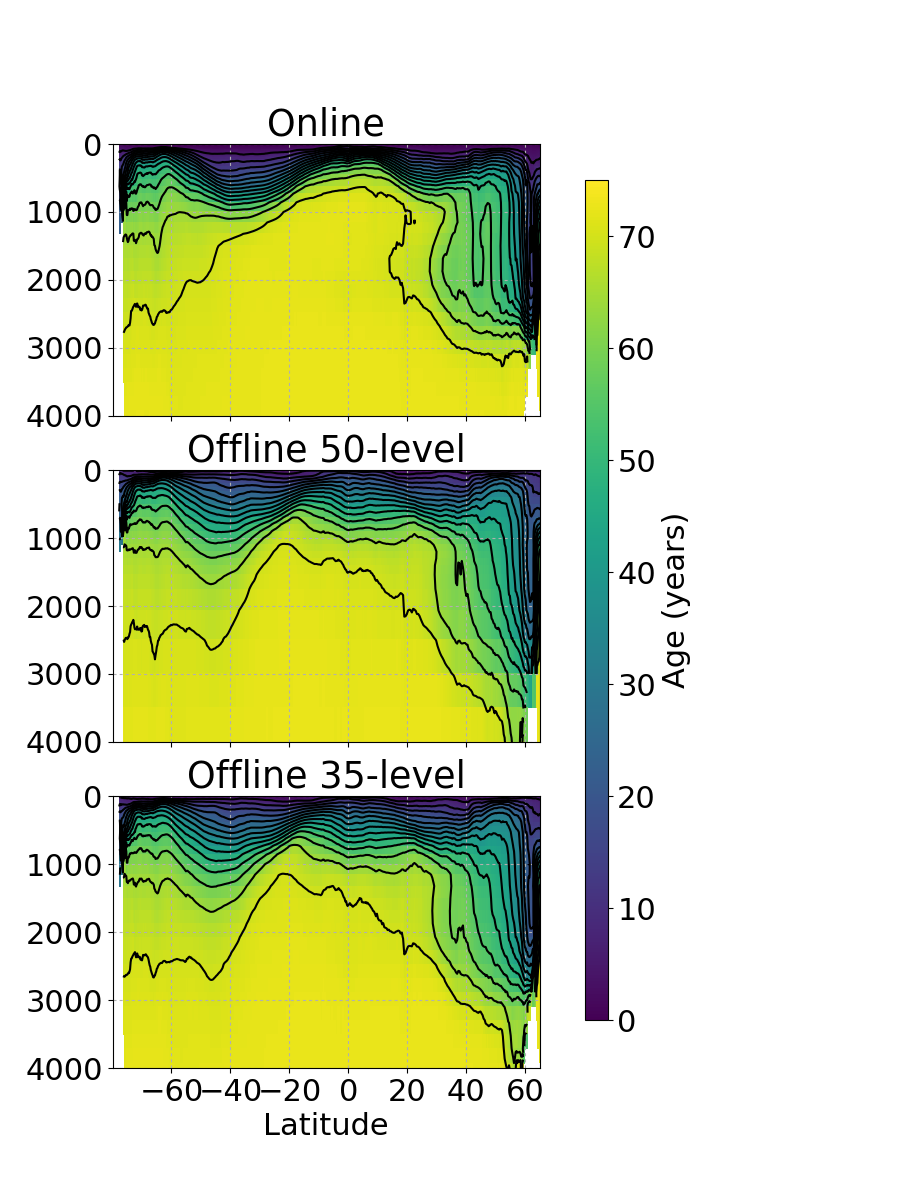

In [150]:
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(9,12))
ax = plt.subplot(3,1,1)
plt.title('Online')
plot_meridional_age(ax,z_vgrid,age_online.mean(axis=2),0,75); 
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(3,1,2)
plt.title('Offline 50-level')
plot_meridional_age(ax,z_woa09,age_woa09.mean(axis=2),0,75); 
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(3,1,3)
plt.title('Offline 35-level')
mesh_ax = plot_meridional_age(ax,z_vgrid,age_vgrid.mean(axis=2),0,75); 
ax.set_xlabel('Latitude')

fig.subplots_adjust(hspace=0.2,right=0.6)
cax = fig.add_axes([0.65, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(0,70,8))
cax.set_ylabel('Age (years)')

<IPython.core.display.Javascript object>


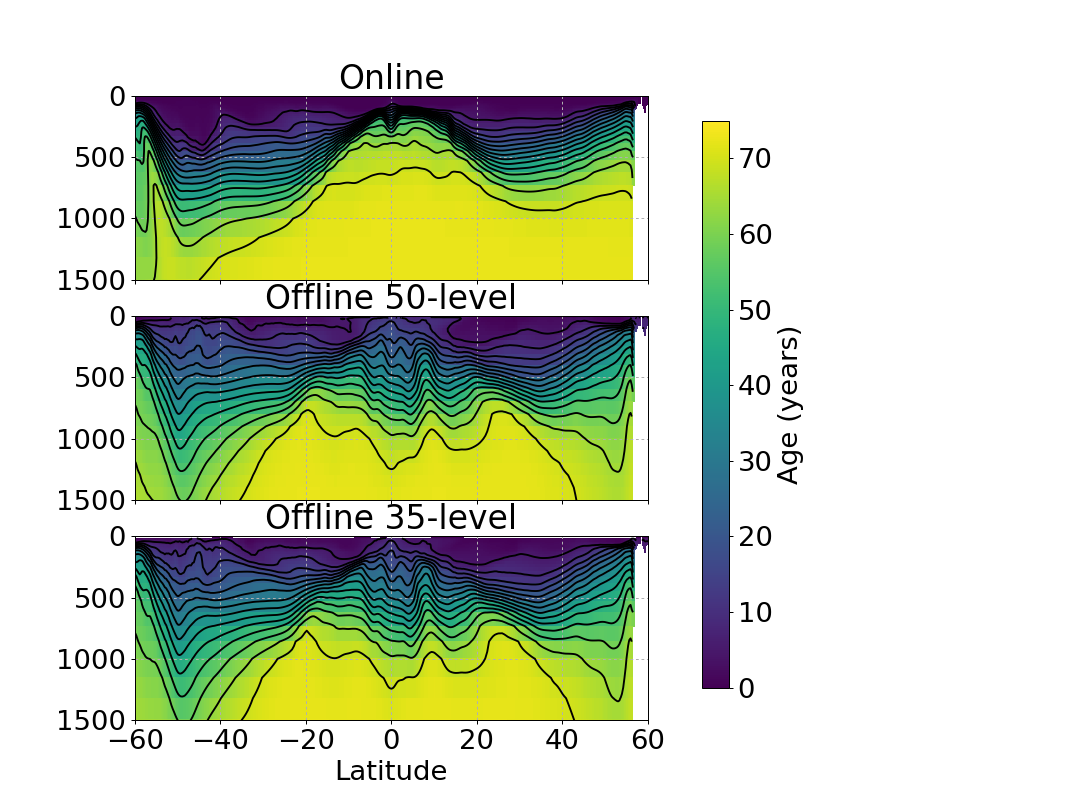

In [181]:
rcParams.update({'font.size': 22})
lonidx = np.argmin(np.abs(lon+152))
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(3,1,1)
plt.title('Online')
plot_meridional_age(ax,z_vgrid,age_online[:,:,lonidx],0,75); ax.set_xlim(-60,60)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(3,1,2)
plt.title('Offline 50-level')
plot_meridional_age(ax,z_woa09,age_woa09[:,:,lonidx],0,75); ax.set_xlim(-60,60)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(3,1,3)
plt.title('Offline 35-level')
mesh_ax = plot_meridional_age(ax,z_vgrid,age_vgrid[:,:,lonidx],0,75); ax.set_xlim(-60,60)
ax.set_xlabel('Latitude')

fig.subplots_adjust(hspace=0.2,right=0.6)
cax = fig.add_axes([0.65, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(0,70,8))
cax.set_ylabel('Age (years)')